In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://www.dropbox.com/s/ut350iwgby9swk2/Sketch_EITZ.zip

--2023-09-03 08:19:22--  https://www.dropbox.com/s/ut350iwgby9swk2/Sketch_EITZ.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ut350iwgby9swk2/Sketch_EITZ.zip [following]
--2023-09-03 08:19:22--  https://www.dropbox.com/s/raw/ut350iwgby9swk2/Sketch_EITZ.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d8e218921ab110155542e32e9.dl.dropboxusercontent.com/cd/0/inline/CDDWZfcia5qKb94RUvLzf80snEtl9GEj2p8kTAzTGySViSBFnrgrEYT8XHpYe1h3wTVU9ui0y23zx2HsWJMfuh-0QJ_pJ2N8YNwzuo94fc7NQpZe_xpiADZgQjbVGzxiMk7KQ7ZZiC9gzj93X2pisc-x/file# [following]
--2023-09-03 08:19:23--  https://uc2d8e218921ab110155542e32e9.dl.dropboxusercontent.com/cd/0/inline/CDDWZfcia5qKb94RUvLzf80snEtl9GEj2p8kTAzTGySViSBFnrgrEYT8XHpYe1h3wTVU9ui0y23zx2HsWJMfuh-0QJ_pJ

In [ ]:
!unzip -qq /content/Sketch_EITZ.zip
!rm /content/Sketch_EITZ.zip

replace Sketch_EITZ/test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os

file = 'example_convnet.py'

base_path = '/content/drive/MyDrive/Computacion/Deep_learning'

file_path = os.path.join(base_path, file)

print(file_path)

/content/drive/MyDrive/Computacion/Deep_learning/example_convnet.py


In [ ]:
import sys
sys.path.append(base_path)

data_path = '/content/Sketch_EITZ'

In [ ]:
"""
This is an example using MNIST dataset with our own customized MLP
"""
import os
import pandas as pd

import tensorflow as tf
import numpy as np
import drive.MyDrive.convnet.simple as simple
import drive.MyDrive.convnet.resnet as resnet
import drive.MyDrive.convnet.metrics2 as metrics
# import drive.MyDrive.Computacion.Deep_learning.convnet.simple as simple
# import drive.MyDrive.Computacion.Deep_learning.convnet.resnet as resnet
# import drive.MyDrive.Computacion.Deep_learning.metrics.metrics as metrics
import matplotlib.pyplot as plt
from keras.callbacks import History

In [ ]:
#Funcion para correr la funcion confusion_matrix
def find_ones_indexes(list_of_lists):
    ones_indexes = []

    for sublist in list_of_lists:
        index = np.where(sublist == 1)
        ones_indexes.append(index[0][0])

    return np.array(ones_indexes)

In [ ]:
batch_size = 64

file_path = os.path.join(data_path, 'train.txt')
test_path = os.path.join(data_path, 'test.txt')
mapping_path = os.path.join(data_path, 'mapping.txt')

df = pd.read_csv(file_path, names=['images', 'labels'], sep='\t')
df_test = pd.read_csv(test_path, names=['images', 'labels'], sep='\t')

classes = pd.read_csv(mapping_path, names=['class', 'idx'], sep='\t').to_dict(orient='dict')['class']

df['labels'] = df['labels'].map(classes)
df['images'] = df['images'].map(lambda x: os.path.join(data_path, x))

df_test['labels'] = df_test['labels'].map(classes)
df_test['images'] = df_test['images'].map(lambda x: os.path.join(data_path, x))

df_test

images      labels
0     /content/Sketch_EITZ/png_w256/motorbike/10771.png   motorbike
1        /content/Sketch_EITZ/png_w256/shovel/15078.png      shovel
2           /content/Sketch_EITZ/png_w256/van/19138.png         van
3     /content/Sketch_EITZ/png_w256/tablelamp/17324.png   tablelamp
4         /content/Sketch_EITZ/png_w256/dragon/5707.png      dragon
...                                                 ...         ...
3995       /content/Sketch_EITZ/png_w256/couch/4703.png       couch
3996  /content/Sketch_EITZ/png_w256/calculator/3198.png  calculator
3997         /content/Sketch_EITZ/png_w256/cow/4771.png         cow
3998     /content/Sketch_EITZ/png_w256/pigeon/12510.png      pigeon
3999      /content/Sketch_EITZ/png_w256/piano/12256.png       piano

[4000 rows x 2 columns]

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=0.2)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_dataframe(df,
                                                    x_col='images',
                                                    y_col='labels',
                                                    target_size=(128, 128),
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    seed=None,
                                                    subset='training'
                                                    )

validation_generator = train_datagen.flow_from_dataframe(df,
                                                    x_col='images',
                                                    y_col='labels',
                                                    target_size=(128, 128),
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    seed=None,
                                                    subset='validation'
                                                    )

Found 12800 validated image filenames belonging to 250 classes.
Found 3200 validated image filenames belonging to 250 classes.


In [ ]:
print(train_generator.class_indices)

shape_data = train_generator[0][0].shape[1:]

{'airplane': 0, 'alarm_clock': 1, 'angel': 2, 'ant': 3, 'apple': 4, 'arm': 5, 'armchair': 6, 'ashtray': 7, 'axe': 8, 'backpack': 9, 'banana': 10, 'barn': 11, 'baseball_bat': 12, 'basket': 13, 'bathtub': 14, 'bear_animal': 15, 'bed': 16, 'bee': 17, 'beer-mug': 18, 'bell': 19, 'bench': 20, 'bicycle': 21, 'binoculars': 22, 'blimp': 23, 'book': 24, 'bookshelf': 25, 'boomerang': 26, 'bottle_opener': 27, 'bowl': 28, 'brain': 29, 'bread': 30, 'bridge': 31, 'bulldozer': 32, 'bus': 33, 'bush': 34, 'butterfly': 35, 'cabinet': 36, 'cactus': 37, 'cake': 38, 'calculator': 39, 'camel': 40, 'camera': 41, 'candle': 42, 'cannon': 43, 'canoe': 44, 'car_sedan': 45, 'carrot': 46, 'castle': 47, 'cat': 48, 'cell_phone': 49, 'chair': 50, 'chandelier': 51, 'church': 52, 'cigarette': 53, 'cloud': 54, 'comb': 55, 'computer-mouse': 56, 'computer_monitor': 57, 'couch': 58, 'cow': 59, 'crab': 60, 'crane_machine': 61, 'crocodile': 62, 'crown': 63, 'cup': 64, 'diamond': 65, 'dog': 66, 'dolphin': 67, 'donut': 68, 'do

#Simple model:

In [ ]:
# create the model
model = simple.SimpleModel(250)
model = model.model(shape_data)

model.summary()

# defining optimizer
opt = tf.keras.optimizers.Adam()

# put all together
model.compile(
         optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 32  320         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 128, 128, 32  128        ['conv1[0][0]']                  
 rmalization)                   )                                                           

In [ ]:
# training or fitting
history = History()
model.fit(train_generator,
        epochs = 10,
        validation_data = validation_generator,
        callbacks=[history])
#Genera overffiting,intentar con epoch 5 o 6 para ver si cambia

Epoch 1/10
200/200 [==============================] - 24s 104ms/step - loss: 4.0197 - accuracy: 0.2091 - val_loss: 5.2880 - val_accuracy: 0.0531
Epoch 2/10
200/200 [==============================] - 12s 61ms/step - loss: 2.3210 - accuracy: 0.5094 - val_loss: 4.0761 - val_accuracy: 0.1953
Epoch 3/10
200/200 [==============================] - 12s 61ms/step - loss: 1.2721 - accuracy: 0.7455 - val_loss: 3.2085 - val_accuracy: 0.3106
Epoch 4/10
200/200 [==============================] - 12s 62ms/step - loss: 0.3806 - accuracy: 0.9567 - val_loss: 3.7287 - val_accuracy: 0.2516
Epoch 5/10
200/200 [==============================] - 13s 64ms/step - loss: 0.0597 - accuracy: 0.9986 - val_loss: 2.8403 - val_accuracy: 0.3859
Epoch 6/10
200/200 [==============================] - 13s 62ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 2.4837 - val_accuracy: 0.4497
Epoch 7/10
200/200 [==============================] - 13s 67ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 2.4349 - val_accuracy

ValueError: ignored

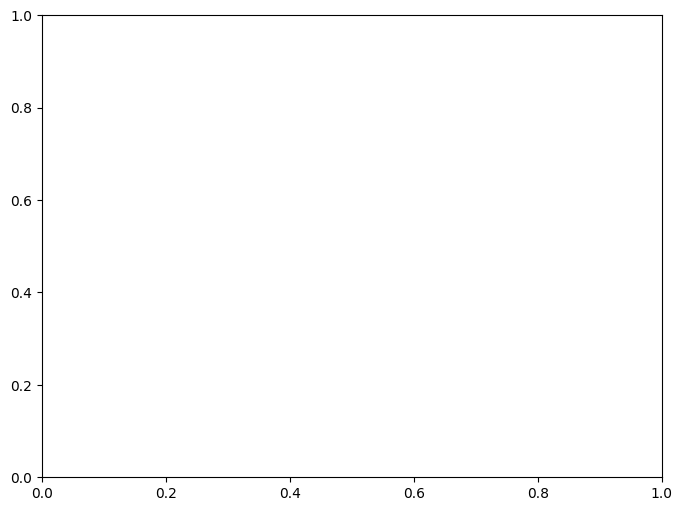

In [ ]:
#Graficos de epoch vs loss y epoch vs accuracy
epochs = 10
epoch_vs_loss_simple = history.history['loss']
epoch_vs_accuracy_simple = history.history['accuracy']

# fig, ax = plt.subplots(figsize = (7.5,7.5))
# ax.bar(range(epochs), epoch_vs_loss_simple)
# plt.xticks(range(epochs), range(1,len(epoch_vs_loss_simple)+1))
# for i, v in enumerate(epoch_vs_loss_simple):
#     ax.text(i, v+0.01, str(round(v,3)), ha='center')
# plt.show()

# fig, ax = plt.subplots(figsize = (7.5,7.5))
# ax.bar(range(epochs), epoch_vs_accuracy_simple)
# plt.xticks(range(epochs), range(1,len(epoch_vs_accuracy_simple)+1))
# for i, v in enumerate(epoch_vs_accuracy_simple):
#     ax.text(i, v+0.01, str(round(v,3)), ha='center')
# plt.show()

# Example data (replace these with your actual data)
epochs = list(range(1, 11))
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, epoch_vs_accuracy_simple, c='blue', marker='o', label='Accuracy')

# Customize the plot
plt.title('Evolución de la precisión por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Show legend (if you have multiple datasets)
plt.legend()

# Display the plot
plt.show()

#Loss vs Epochs

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, epoch_vs_loss_simple, c='blue', marker='o', label='Loss')

# Customize the plot
plt.title('Evolución de la Pérdida por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Show legend (if you have multiple datasets)
plt.legend()

# Display the plot
plt.show()

In [ ]:
datagen_kwargs1 = dict(rescale=1./255, validation_split=0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs1)

test_generator = test_datagen.flow_from_dataframe(df_test,
                                                    x_col='images',
                                                    y_col='labels',
                                                    target_size=(128, 128),
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    seed=None,
                                                    subset='training'
                                                    )

Found 4000 validated image filenames belonging to 250 classes.


In [ ]:
# prediction using directly the trained model
# there is also a function called -- predict -- , you can check it
mc_simple = 0
accuracy_sum = 0

for batch in range(len(test_generator)):

  imgs = test_generator[batch][0]

  y_true = find_ones_indexes(test_generator[batch][1])
  y_pred = model(imgs, training = False)
  accuracy_sum += metrics.multiclass_accuracy(y_true, y_pred)
  # computing confusion_matrix
  mc_simple += metrics.confusion_matrix(y_true, y_pred, 250)

print(mc_simple)
# mc as percentages
rmc_simple = mc_simple.astype(np.float32) / np.sum(mc_simple, axis = 1, keepdims = True)
print(rmc_simple) #Precision del modelo por clase
rmc = (rmc_simple * 100).astype(np.int32) / 100
simple_model_accuracy = accuracy_sum/len(test_generator)
print("Accuracy del modelo simple es de ", simple_model_accuracy)


[[ 7  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  1  6 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 14]]
[[0.46666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.5        0.         ... 0.         0.         0.        ]
 [0.         0.05555556 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.94736842 0.         0.        ]
 [0.         0.         0.         ... 0.         0.5        0.        ]
 [0.         0.         0.         ... 0.         0.         0.77777778]]
Accuracy del modelo simple es de  0.48586309523809523


#RESNET model:

In [ ]:
resnet_model = resnet.ResNet([2,2,2,2], [64,128,256,512], 250).model([128,128,1])

block_sizes = [2, 2, 2, 2]
filters = [64, 128, 256, 512]

# resnet_model.build(input_shape = (64, 128, 128, 1))
resnet_model.summary()

#optimizador
opt = tf.keras.optimizers.Adam()

# put all together
resnet_model.compile(
         optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 backbone (ResNetBackbone)   (None, 4, 4, 512)         11176256  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 classifier (Dense)          (None, 250)               128250    
                                                                 
 softmax_1 (Softmax)         (None, 250)               0         
                                                           

In [ ]:
# training or fitting
history = History()
resnet_model.fit(train_generator,
        epochs = 25,
        validation_data = validation_generator,
        callbacks=[history])


Epoch 1/25
200/200 [==============================] - 27s 82ms/step - loss: 4.6089 - accuracy: 0.0724 - val_loss: 12.3095 - val_accuracy: 0.0137
Epoch 2/25
200/200 [==============================] - 16s 80ms/step - loss: 3.5679 - accuracy: 0.1942 - val_loss: 5.8284 - val_accuracy: 0.0559
Epoch 3/25
200/200 [==============================] - 16s 81ms/step - loss: 2.9199 - accuracy: 0.3059 - val_loss: 8.5205 - val_accuracy: 0.0184
Epoch 4/25
200/200 [==============================] - 16s 80ms/step - loss: 2.3631 - accuracy: 0.4162 - val_loss: 7.8582 - val_accuracy: 0.0500
Epoch 5/25
200/200 [==============================] - 16s 80ms/step - loss: 1.9291 - accuracy: 0.5064 - val_loss: 5.6998 - val_accuracy: 0.1181
Epoch 6/25
200/200 [==============================] - 16s 80ms/step - loss: 1.5571 - accuracy: 0.5835 - val_loss: 5.3944 - val_accuracy: 0.1628
Epoch 7/25
200/200 [==============================] - 16s 80ms/step - loss: 1.2334 - accuracy: 0.6627 - val_loss: 6.5679 - val_accuracy

ValueError: ignored

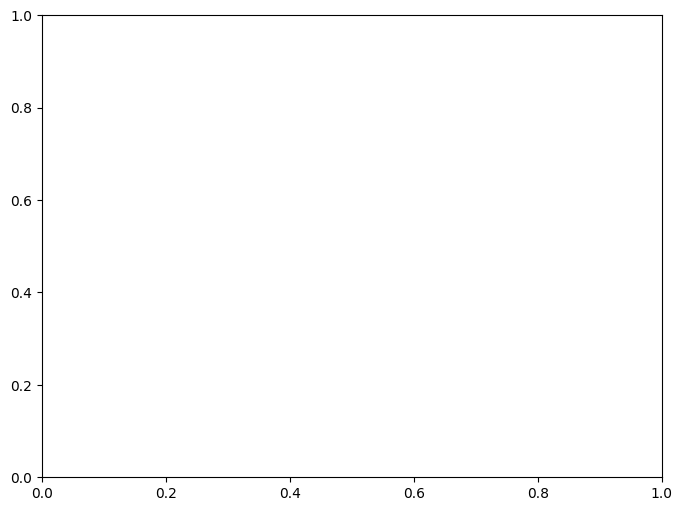

In [ ]:
#Graficos de epoch vs loss y epoch vs accuracy
# print(history.history.keys())
epochs = 50
epoch_vs_loss_resnet = history.history['loss']
epoch_vs_accuracy_resnet = history.history['accuracy']
epoch_vs_val_loss_resnet = history.history['val_loss']
epoch_vs_val_accuracy_resnet = history.history['val_accuracy']


epochs = list(range(1, 51))
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, epoch_vs_accuracy_resnet, c='blue', marker='o', label='Accuracy')

# Customize the plot
plt.title('Evolución de la precisión por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
# Show legend (if you have multiple datasets)
plt.legend()
# Display the plot
plt.show()

#Loss vs Epochs
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, epoch_vs_loss_resnet, c='blue', marker='o', label='Loss')

# Customize the plot
plt.title('Evolución de la Pérdida por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
# Show legend (if you have multiple datasets)
plt.legend()
# Display the plot
plt.show()

#val_Loss vs Epochs
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, epoch_vs_val_loss_resnet, c='blue', marker='o', label='Loss')

# Customize the plot
plt.title('Evolución de la Pérdida por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
# Show legend (if you have multiple datasets)
plt.legend()
# Display the plot
plt.show()

#val_Accuracy vs Epochs
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, epoch_vs_val_accuracy_resnet, c='blue', marker='o', label='Loss')

# Customize the plot
plt.title('Evolución de la Precision por Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
# Show legend (if you have multiple datasets)
plt.legend()
# Display the plot
plt.show()

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

test_generator = test_datagen.flow_from_dataframe(df_test,
                                                    x_col='images',
                                                    y_col='labels',
                                                    target_size=(128, 128),
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    seed=None,
                                                    subset='training'
                                                    )

Found 4000 validated image filenames belonging to 250 classes.


In [ ]:
# prediction using directly the trained model
# there is also a function called -- predict -- , you can check it
mc_resnet = 0
accuracy_sum = 0

for batch in range(len(test_generator)):

  imgs = test_generator[batch][0]

  y_true = find_ones_indexes(test_generator[batch][1])
  y_pred = resnet_model(imgs, training = False)
  accuracy_sum += metrics.multiclass_accuracy(y_true, y_pred)
  # computing confusion_matrix
  mc_resnet += metrics.confusion_matrix(y_true, y_pred, 250)

print(mc_resnet)
# mc as percentages
rmc_resnet = mc_resnet.astype(np.float32) / np.sum(mc_resnet, axis = 1, keepdims = True)
print(rmc_resnet) #Precision del modelo por clase
rmc = (rmc_resnet * 100).astype(np.int32) / 100
resnet_model_accuracy = accuracy_sum/len(test_generator)
print("Accuracy del modelo es de ", resnet_model_accuracy)


[[ 5  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  6]]
[[0.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         0.33333333 0.         ... 0.         0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.89473684 0.         0.        ]
 [0.         0.         0.         ... 0.         0.44444444 0.        ]
 [0.         0.         0.         ... 0.         0.         0.33333333]]
Accuracy del modelo es de  0.45014880952380953


In [ ]:
def sumColumn(m):
    answer = []
    for row in range(len(m[0])):
        t = sum(m[row])
        # print(m[row][row]/ t)
        answer.append(m[row][row]/ t)
    return answer
def sumTotal(m):
    answer = []
    for row in range(len(m[0])):
        t = sum(m[row])
        # print(m[row][row]/ t)
        answer.append(t)
    return sum(answer)

# print(sumColumn(mc_simple))

print(sumTotal(mc_resnet))





4000


#Resutados finales

[0.4666666666666667, 0.5, 0.3333333333333333, 0.2777777777777778, 0.8823529411764706, 0.23076923076923078, 0.1111111111111111, 0.35714285714285715, 0.6153846153846154, 0.2857142857142857, 0.3125, 0.4666666666666667, 0.4, 0.4117647058823529, 0.5555555555555556, 0.1875, 0.35714285714285715, 0.4166666666666667, 0.4, 0.5, 0.16666666666666666, 0.5625, 0.0625, 0.5555555555555556, 0.6, 0.5454545454545454, 0.5, 0.38461538461538464, 0.8, 0.36, 0.25, 0.25, 0.25, 0.6, 0.10526315789473684, 0.3, 0.2, 0.5454545454545454, 0.2777777777777778, 0.6666666666666666, 0.8, 0.6470588235294118, 0.7777777777777778, 0.3076923076923077, 0.375, 0.5, 0.2777777777777778, 0.42105263157894735, 0.0, 0.7142857142857143, 0.5, 0.23809523809523808, 0.5714285714285714, 0.7272727272727273, 0.7619047619047619, 0.9285714285714286, 0.25, 0.8333333333333334, 0.5333333333333333, 0.25, 0.5882352941176471, 0.23809523809523808, 0.3888888888888889, 0.4, 0.4, 0.6842105263157895, 0.23529411764705882, 0.11764705882352941, 0.68421052631

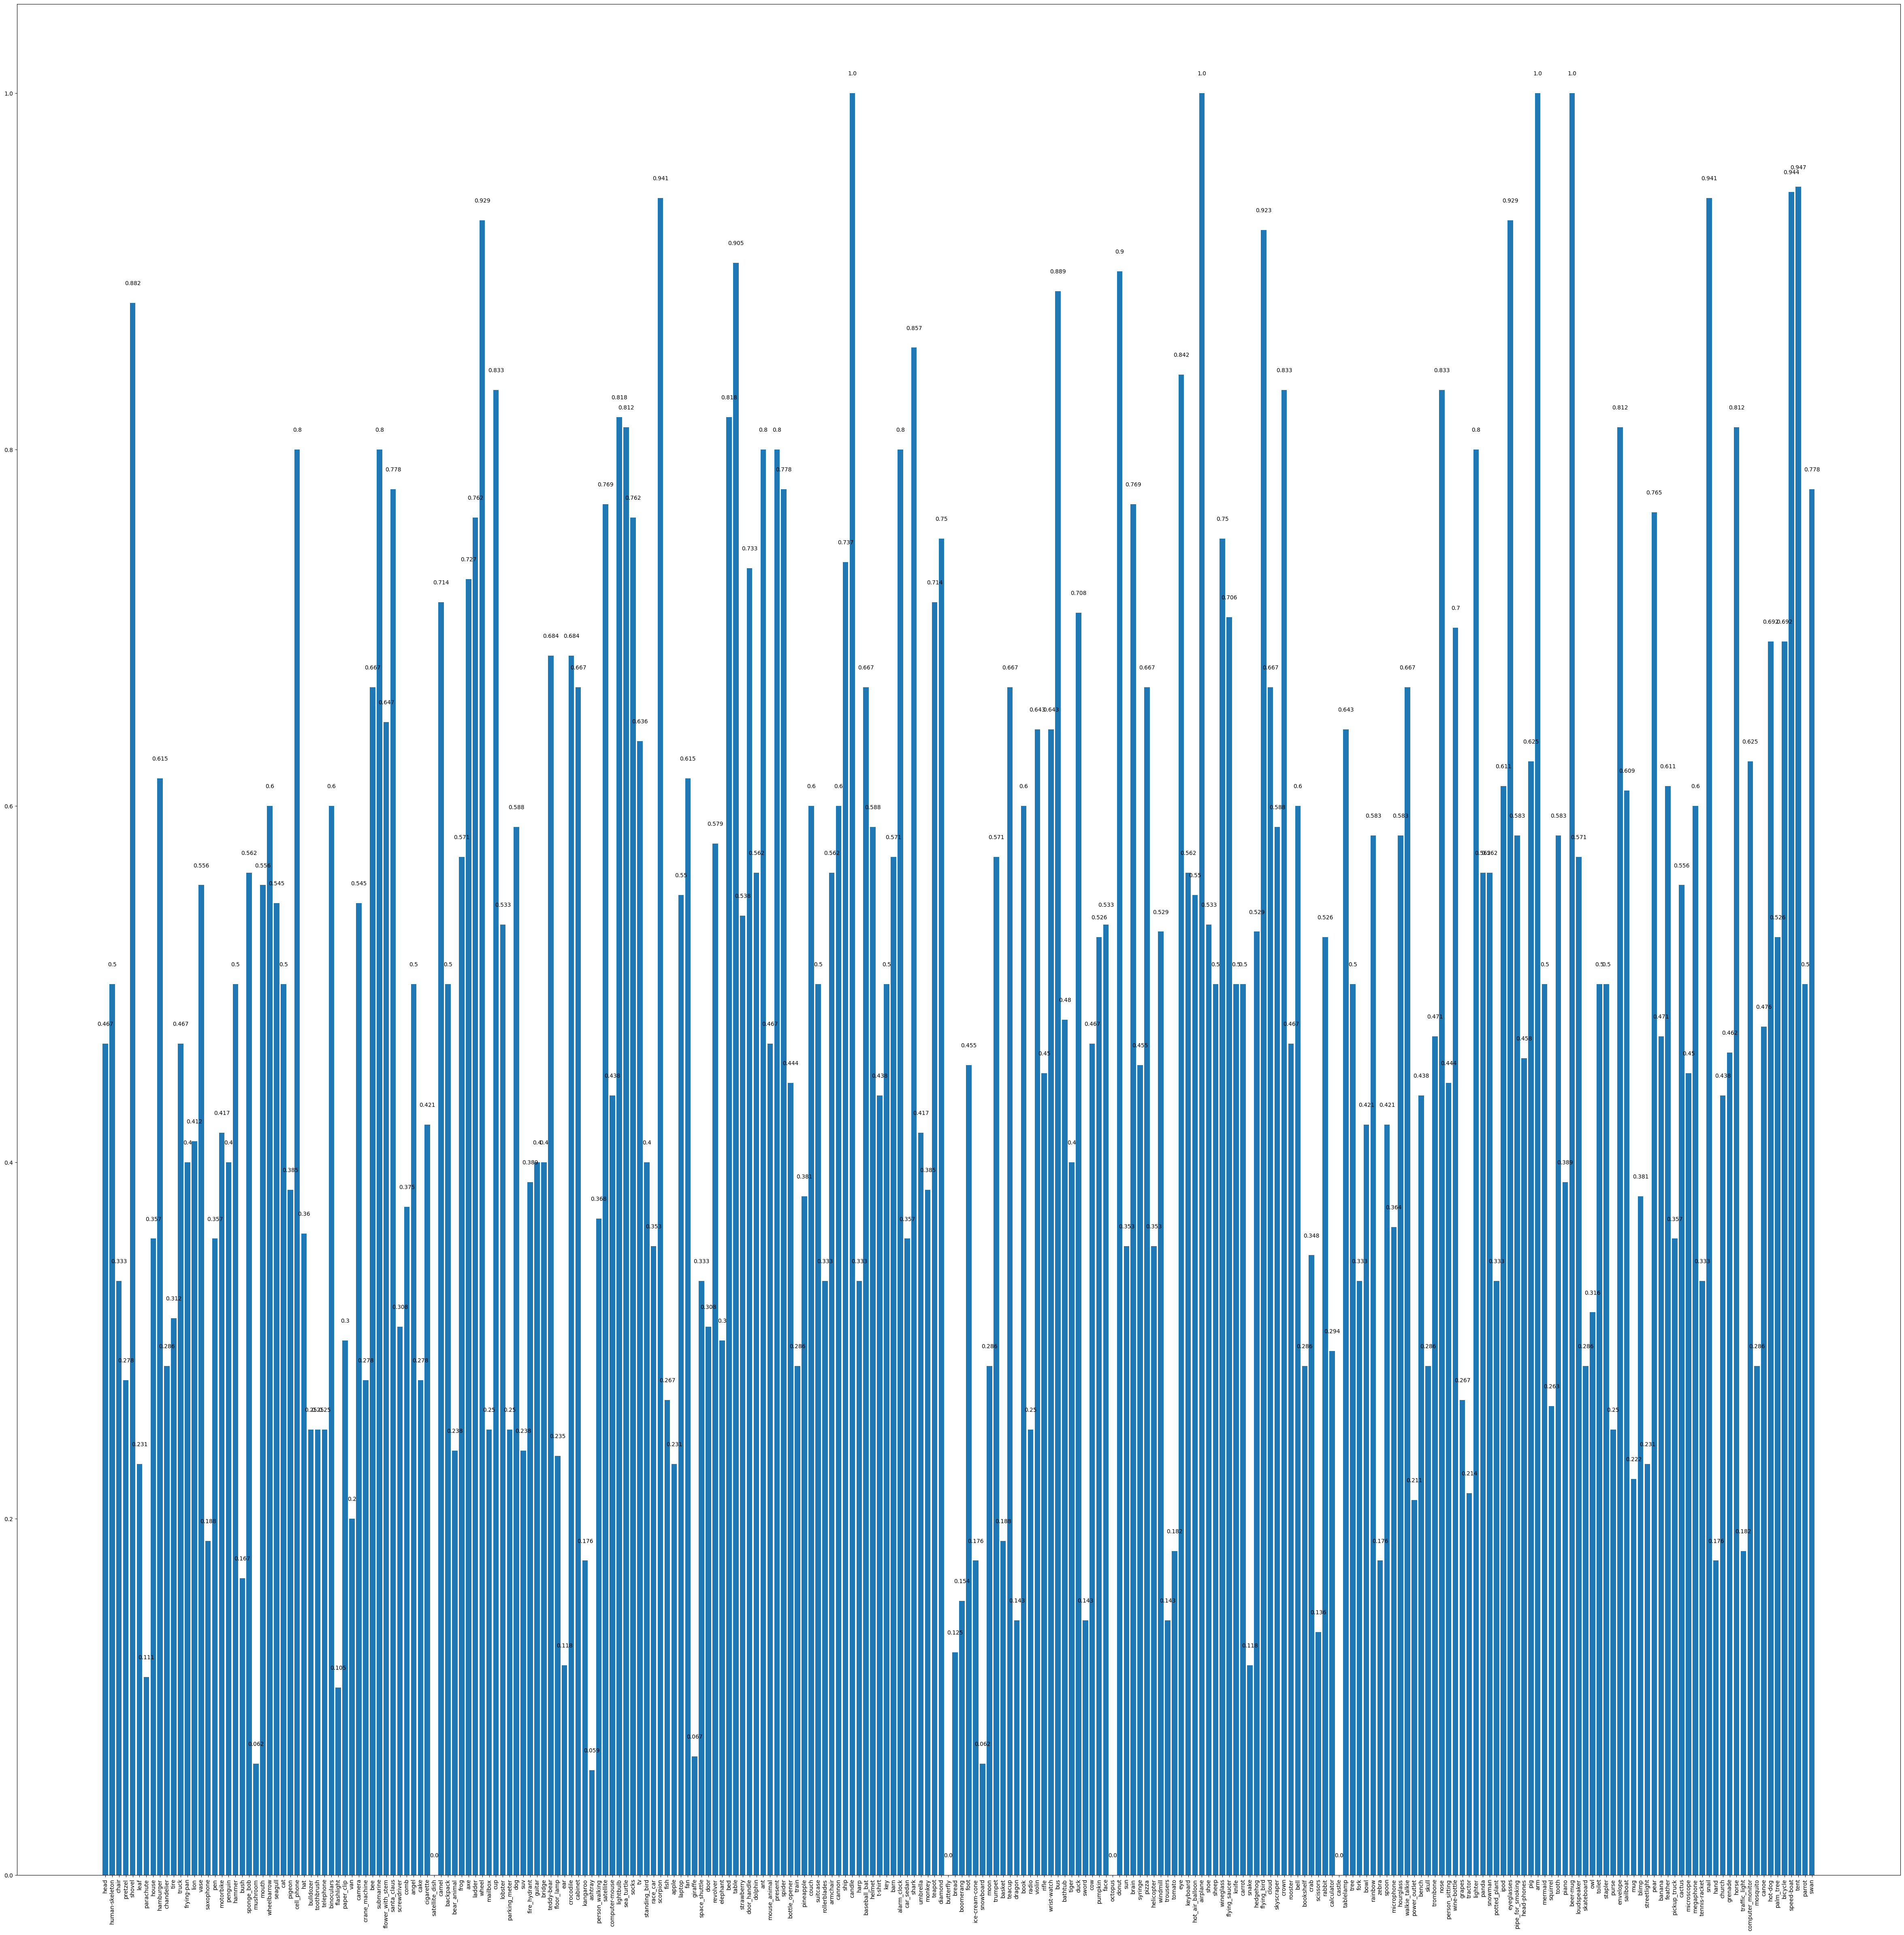

In [ ]:
#Accuracy for simple model
accuracy_per_class_simple = []
for i in range(len(rmc[0])):
  accuracy_per_class_simple.append(rmc_simple[i][i])

print(accuracy_per_class_simple)

fig, ax = plt.subplots(figsize = (60,60))
ax.bar(classes.values(), accuracy_per_class_simple)
plt.xticks(range(250), labels=classes.values(), rotation=90)
#plt.yticks(range(250), labels=y)
for i, v in enumerate(accuracy_per_class_simple):
    ax.text(i, v+0.01, str(round(v,3)), ha='center')
plt.show()


[0.6, 0.5, 0.2777777777777778, 0.5, 0.7058823529411765, 0.38461538461538464, 0.5555555555555556, 0.42857142857142855, 0.38461538461538464, 0.5, 0.375, 0.06666666666666667, 0.6, 0.29411764705882354, 0.5, 0.375, 0.42857142857142855, 0.25, 0.5333333333333333, 0.5, 0.5833333333333334, 0.5625, 0.25, 0.3333333333333333, 0.5333333333333333, 0.7272727272727273, 0.6666666666666666, 0.6153846153846154, 0.8666666666666667, 0.6, 0.25, 0.3125, 0.3333333333333333, 0.8, 0.3157894736842105, 0.3, 0.06666666666666667, 0.5909090909090909, 0.3888888888888889, 0.7222222222222222, 0.8666666666666667, 0.6470588235294118, 0.7777777777777778, 0.5384615384615384, 0.4166666666666667, 0.5, 0.5, 0.631578947368421, 0.15, 0.7857142857142857, 0.7, 0.42857142857142855, 0.42857142857142855, 0.7272727272727273, 0.6190476190476191, 0.7857142857142857, 0.375, 0.6666666666666666, 0.6, 0.4166666666666667, 0.6470588235294118, 0.2857142857142857, 0.3333333333333333, 0.65, 0.26666666666666666, 0.6842105263157895, 0.47058823529

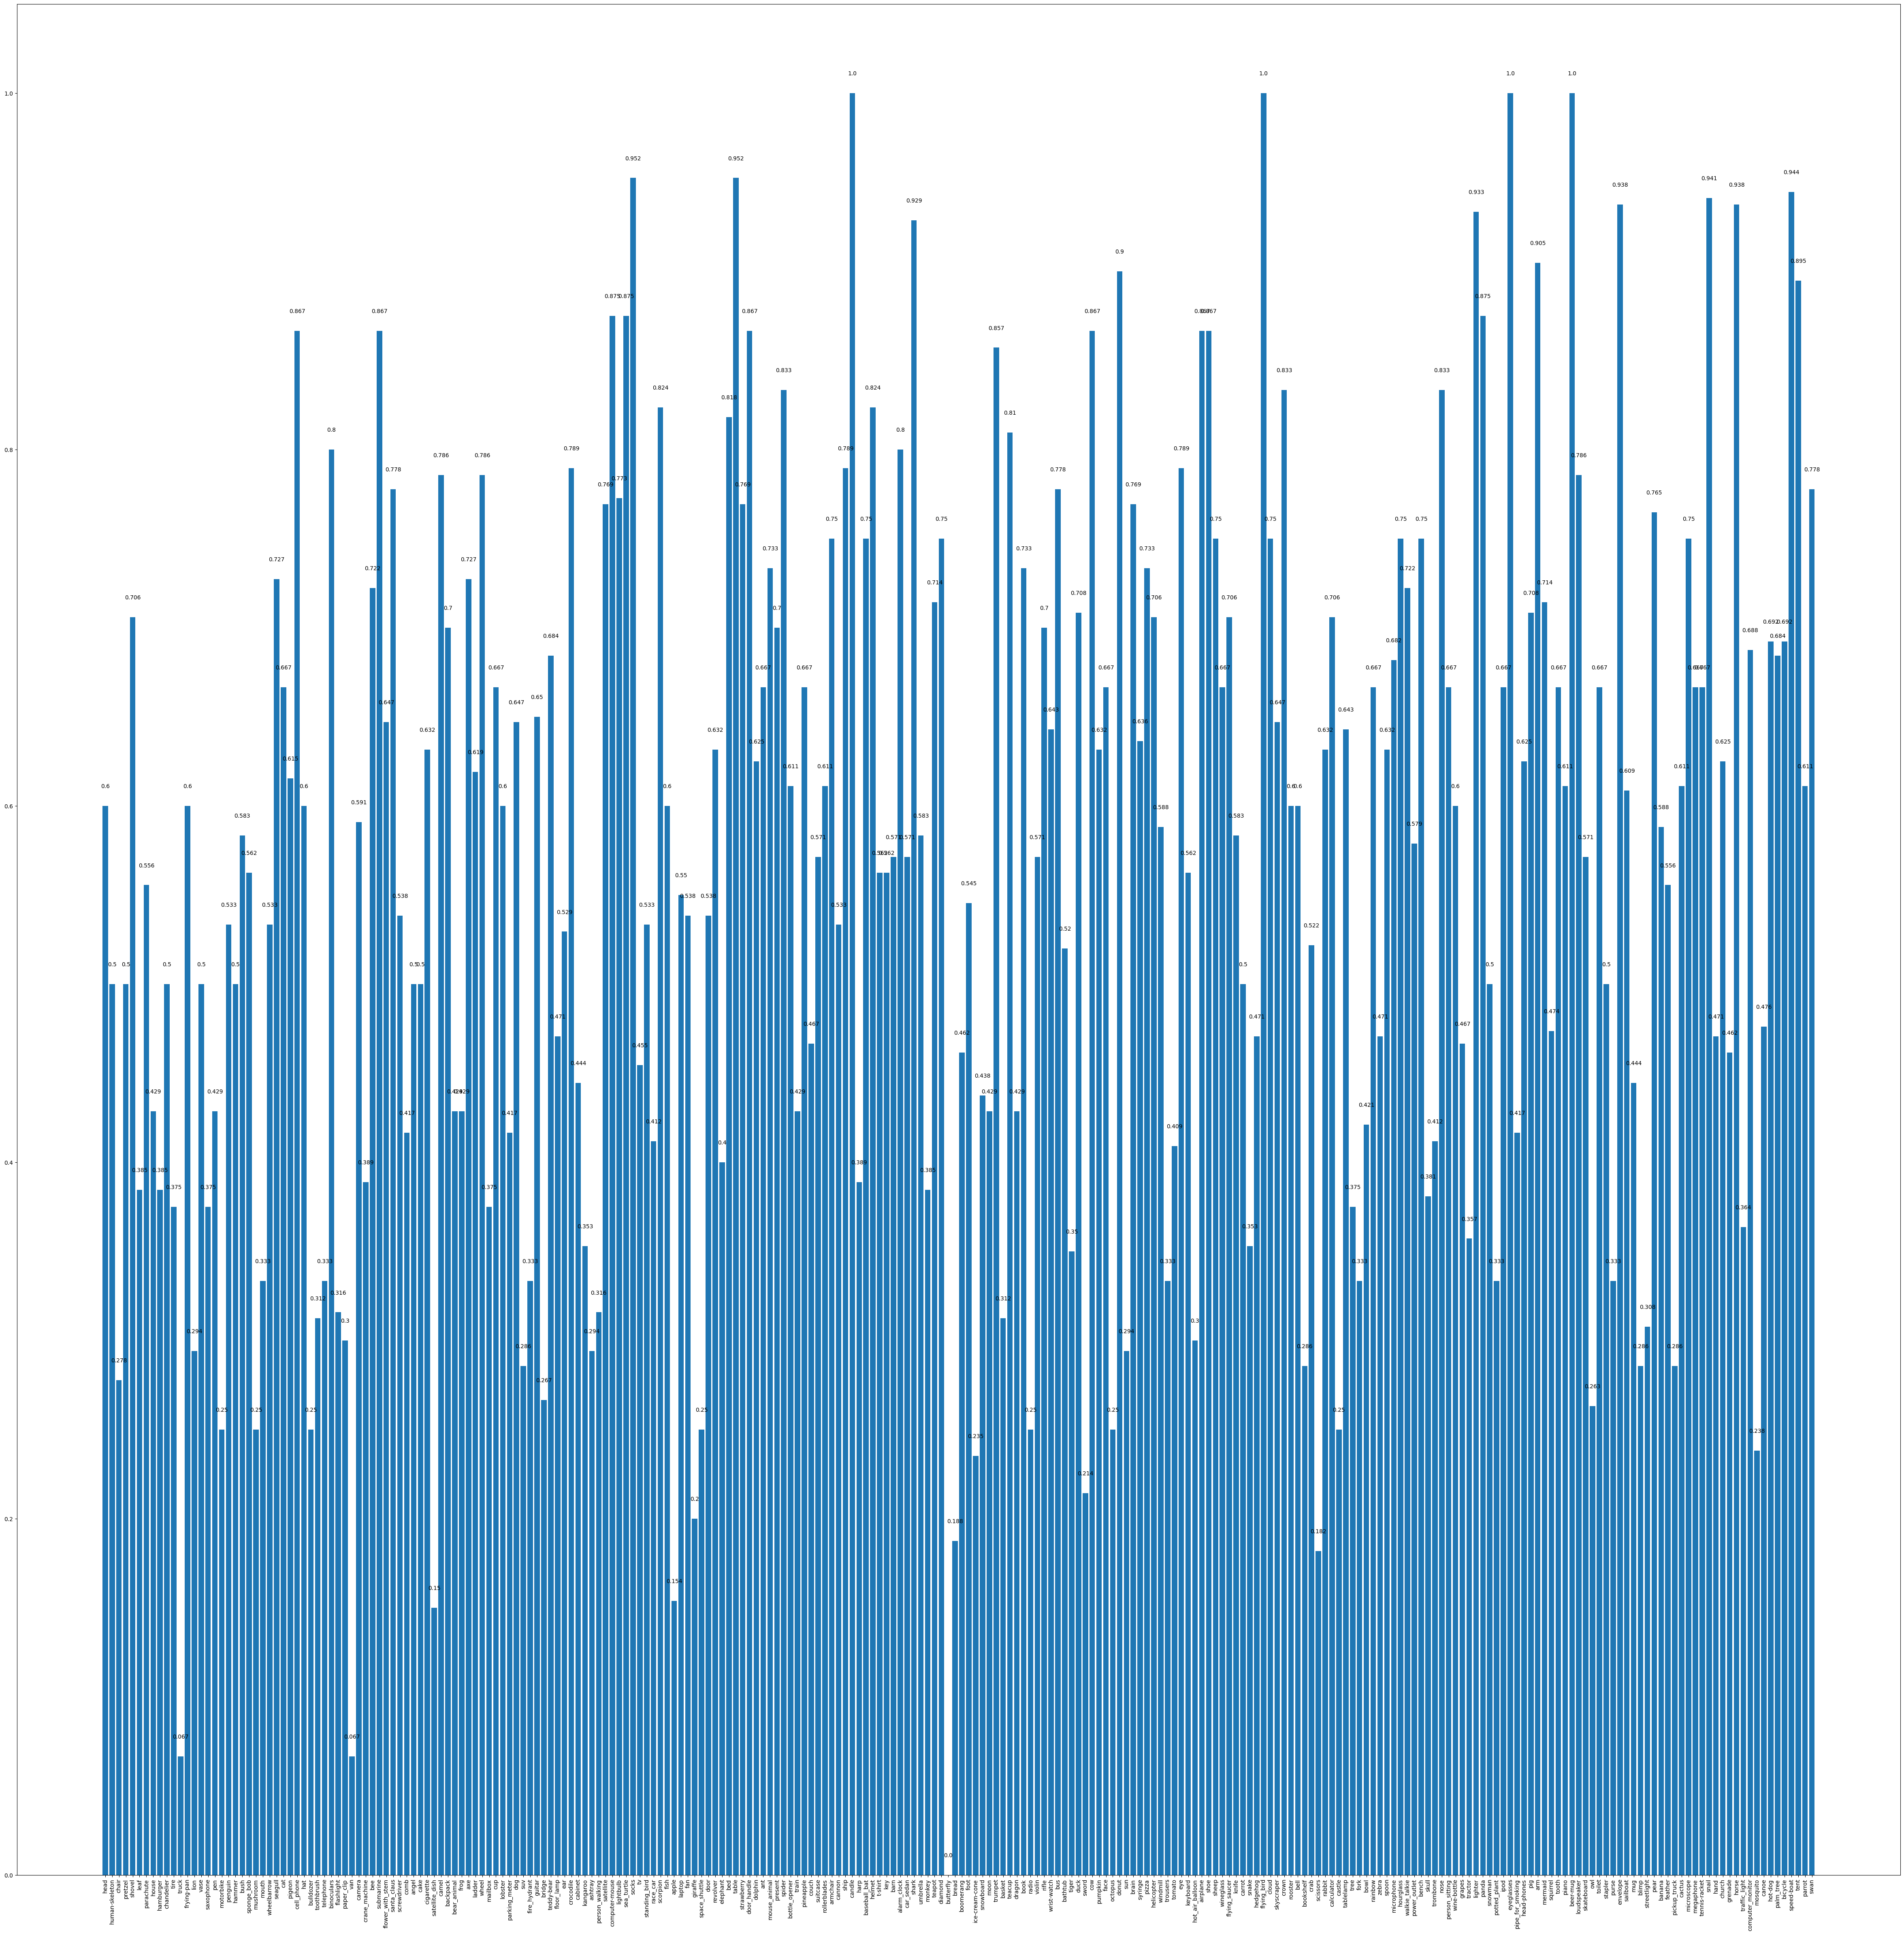

In [ ]:
#Accuracy for RESNET model
accuracy_per_class_resnet = []
for i in range(len(rmc[0])):
  accuracy_per_class_resnet.append(rmc_resnet[i][i])

print(accuracy_per_class_resnet)

fig, ax = plt.subplots(figsize = (60,60))
ax.bar(classes.values(), accuracy_per_class_resnet)
plt.xticks(range(250), labels=classes.values(), rotation=90)
#plt.yticks(range(250), labels=y)
for i, v in enumerate(accuracy_per_class_resnet):
    ax.text(i, v+0.01, str(round(v,3)), ha='center')
plt.show()

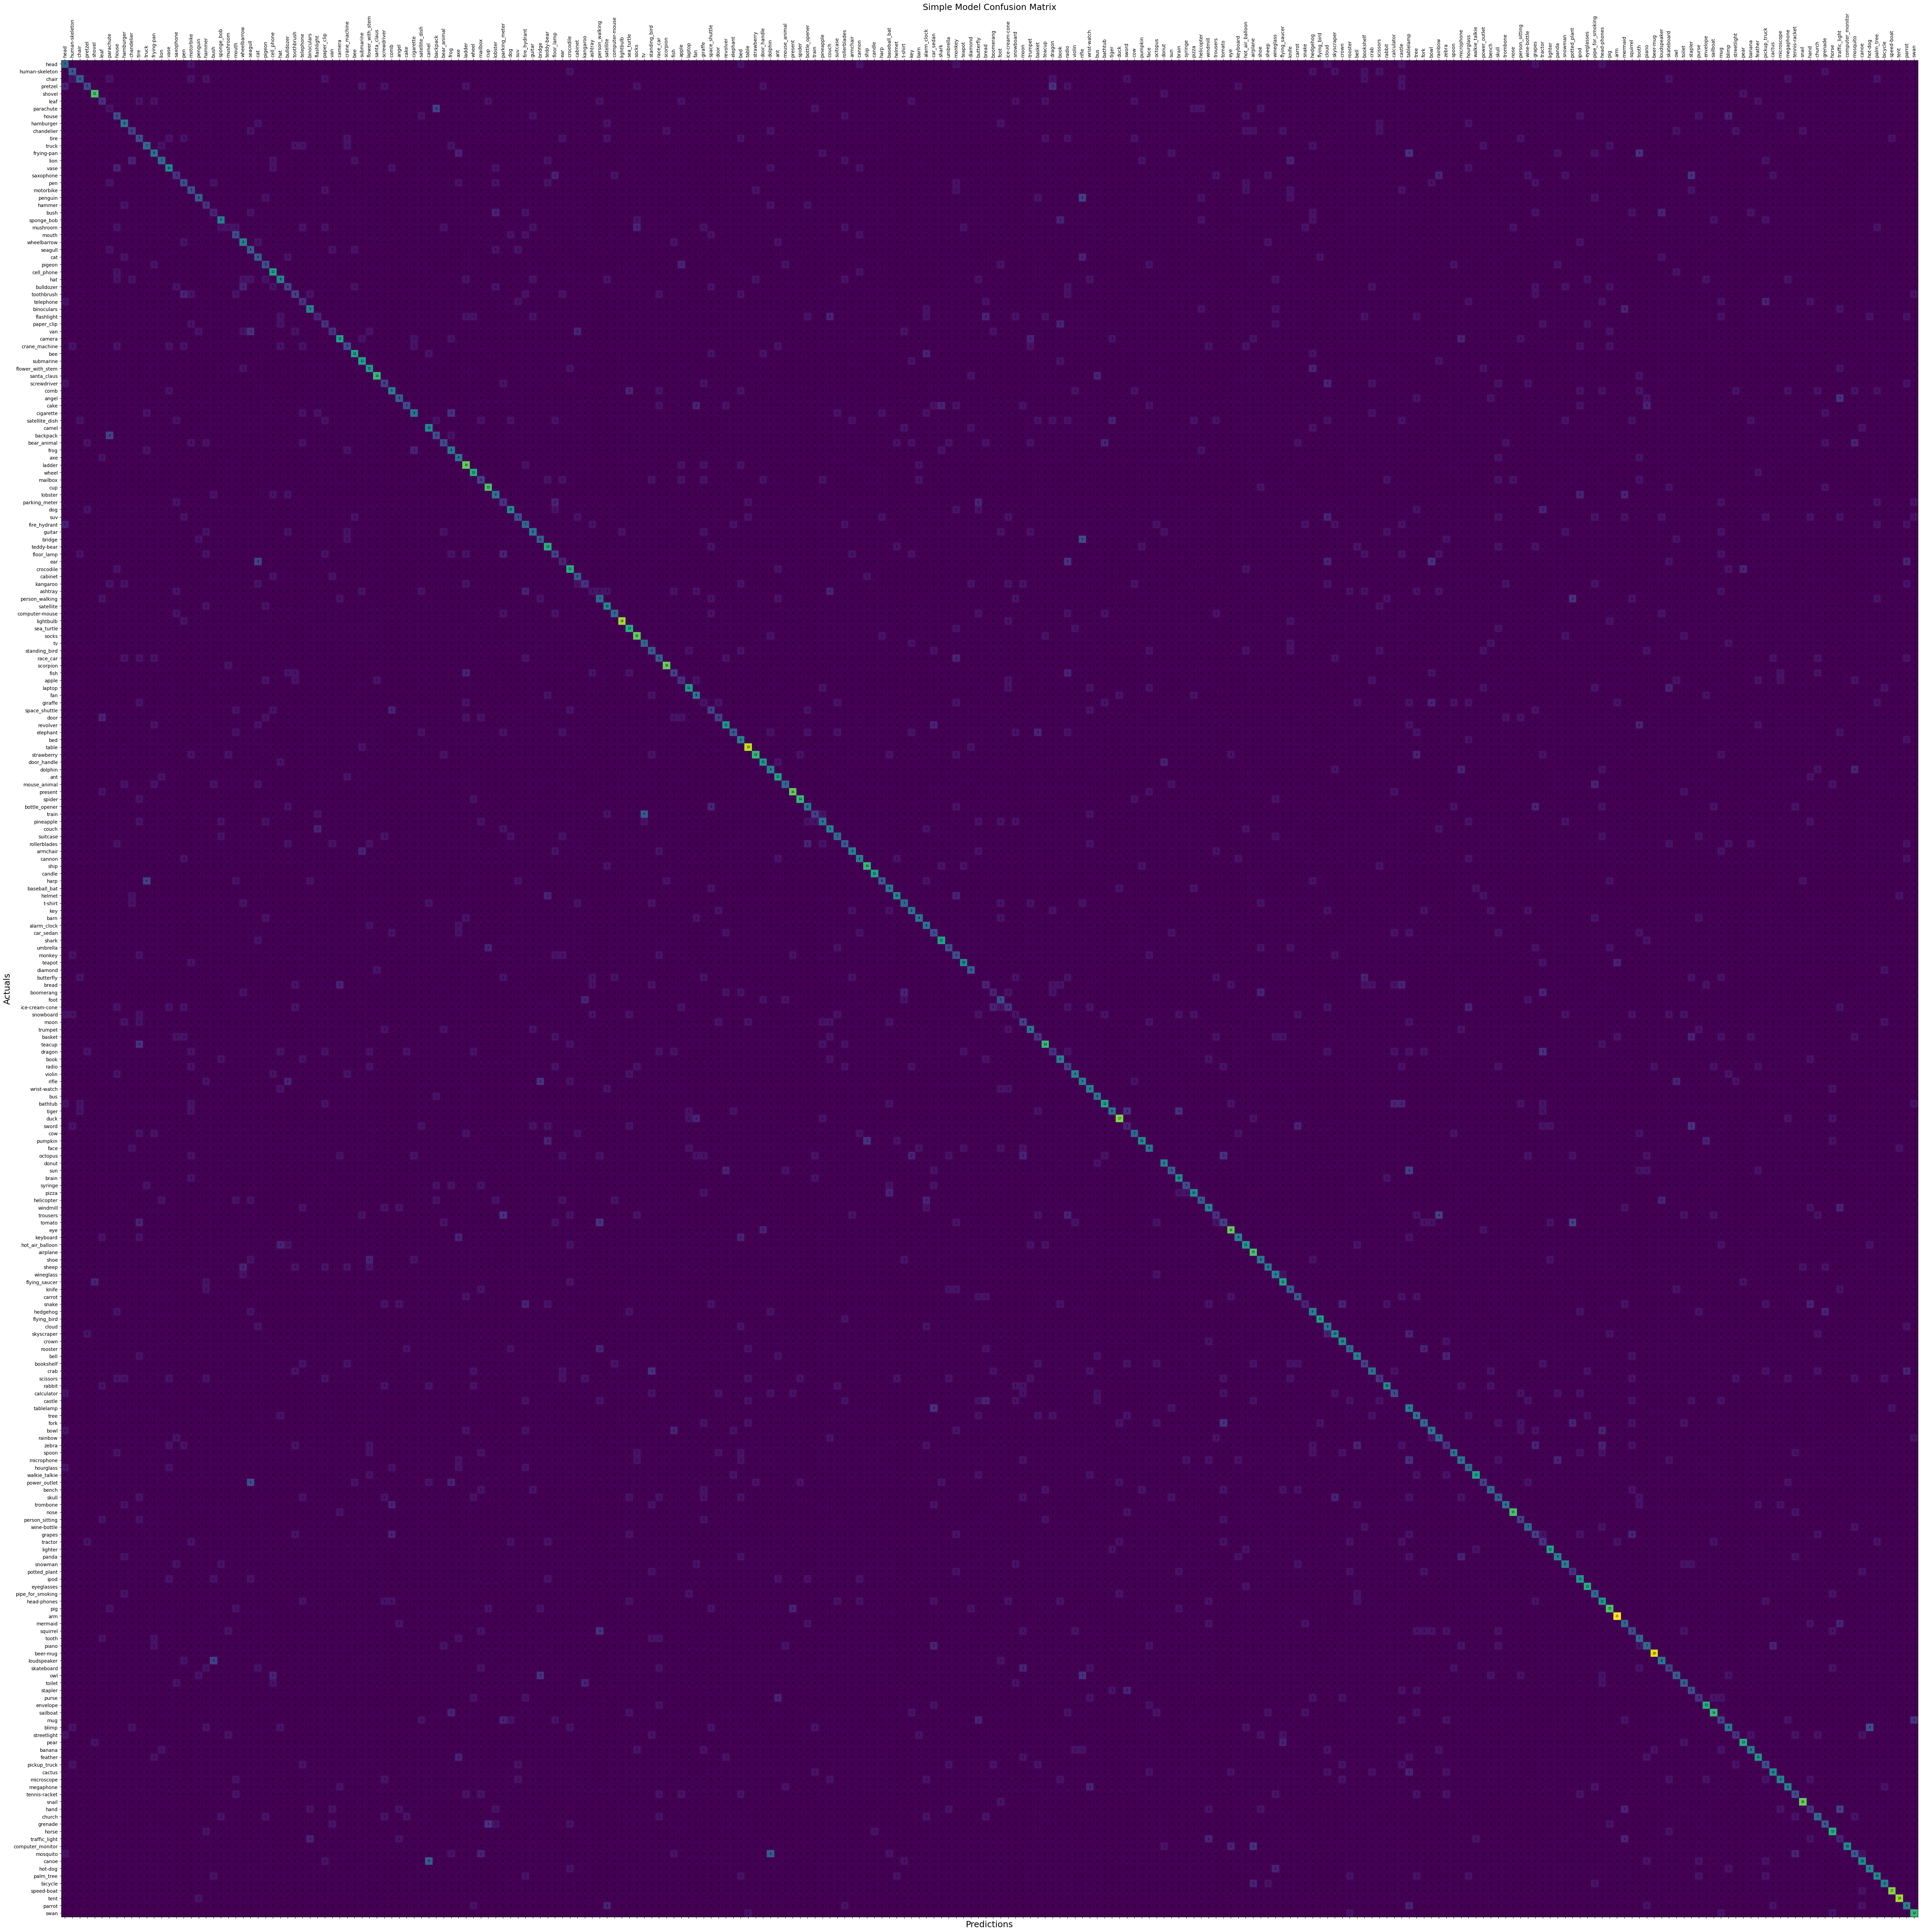

In [ ]:
fig, ax = plt.subplots(figsize=(70, 70))
ax.matshow(mc_simple)
for i in range(mc_simple.shape[0]):
  for j in range(mc_simple.shape[1]):
    ax.text(x=j, y=i,s=round(mc_simple[i, j], 2), va='center', ha='center', size='xx-small')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Simple Model Confusion Matrix', fontsize=18)
plt.xticks(range(250), labels=classes.values(), rotation=90)
plt.yticks(range(250), labels=classes.values())
#plt.savefig("matrix_de_confusion_simple.png")
plt.show()

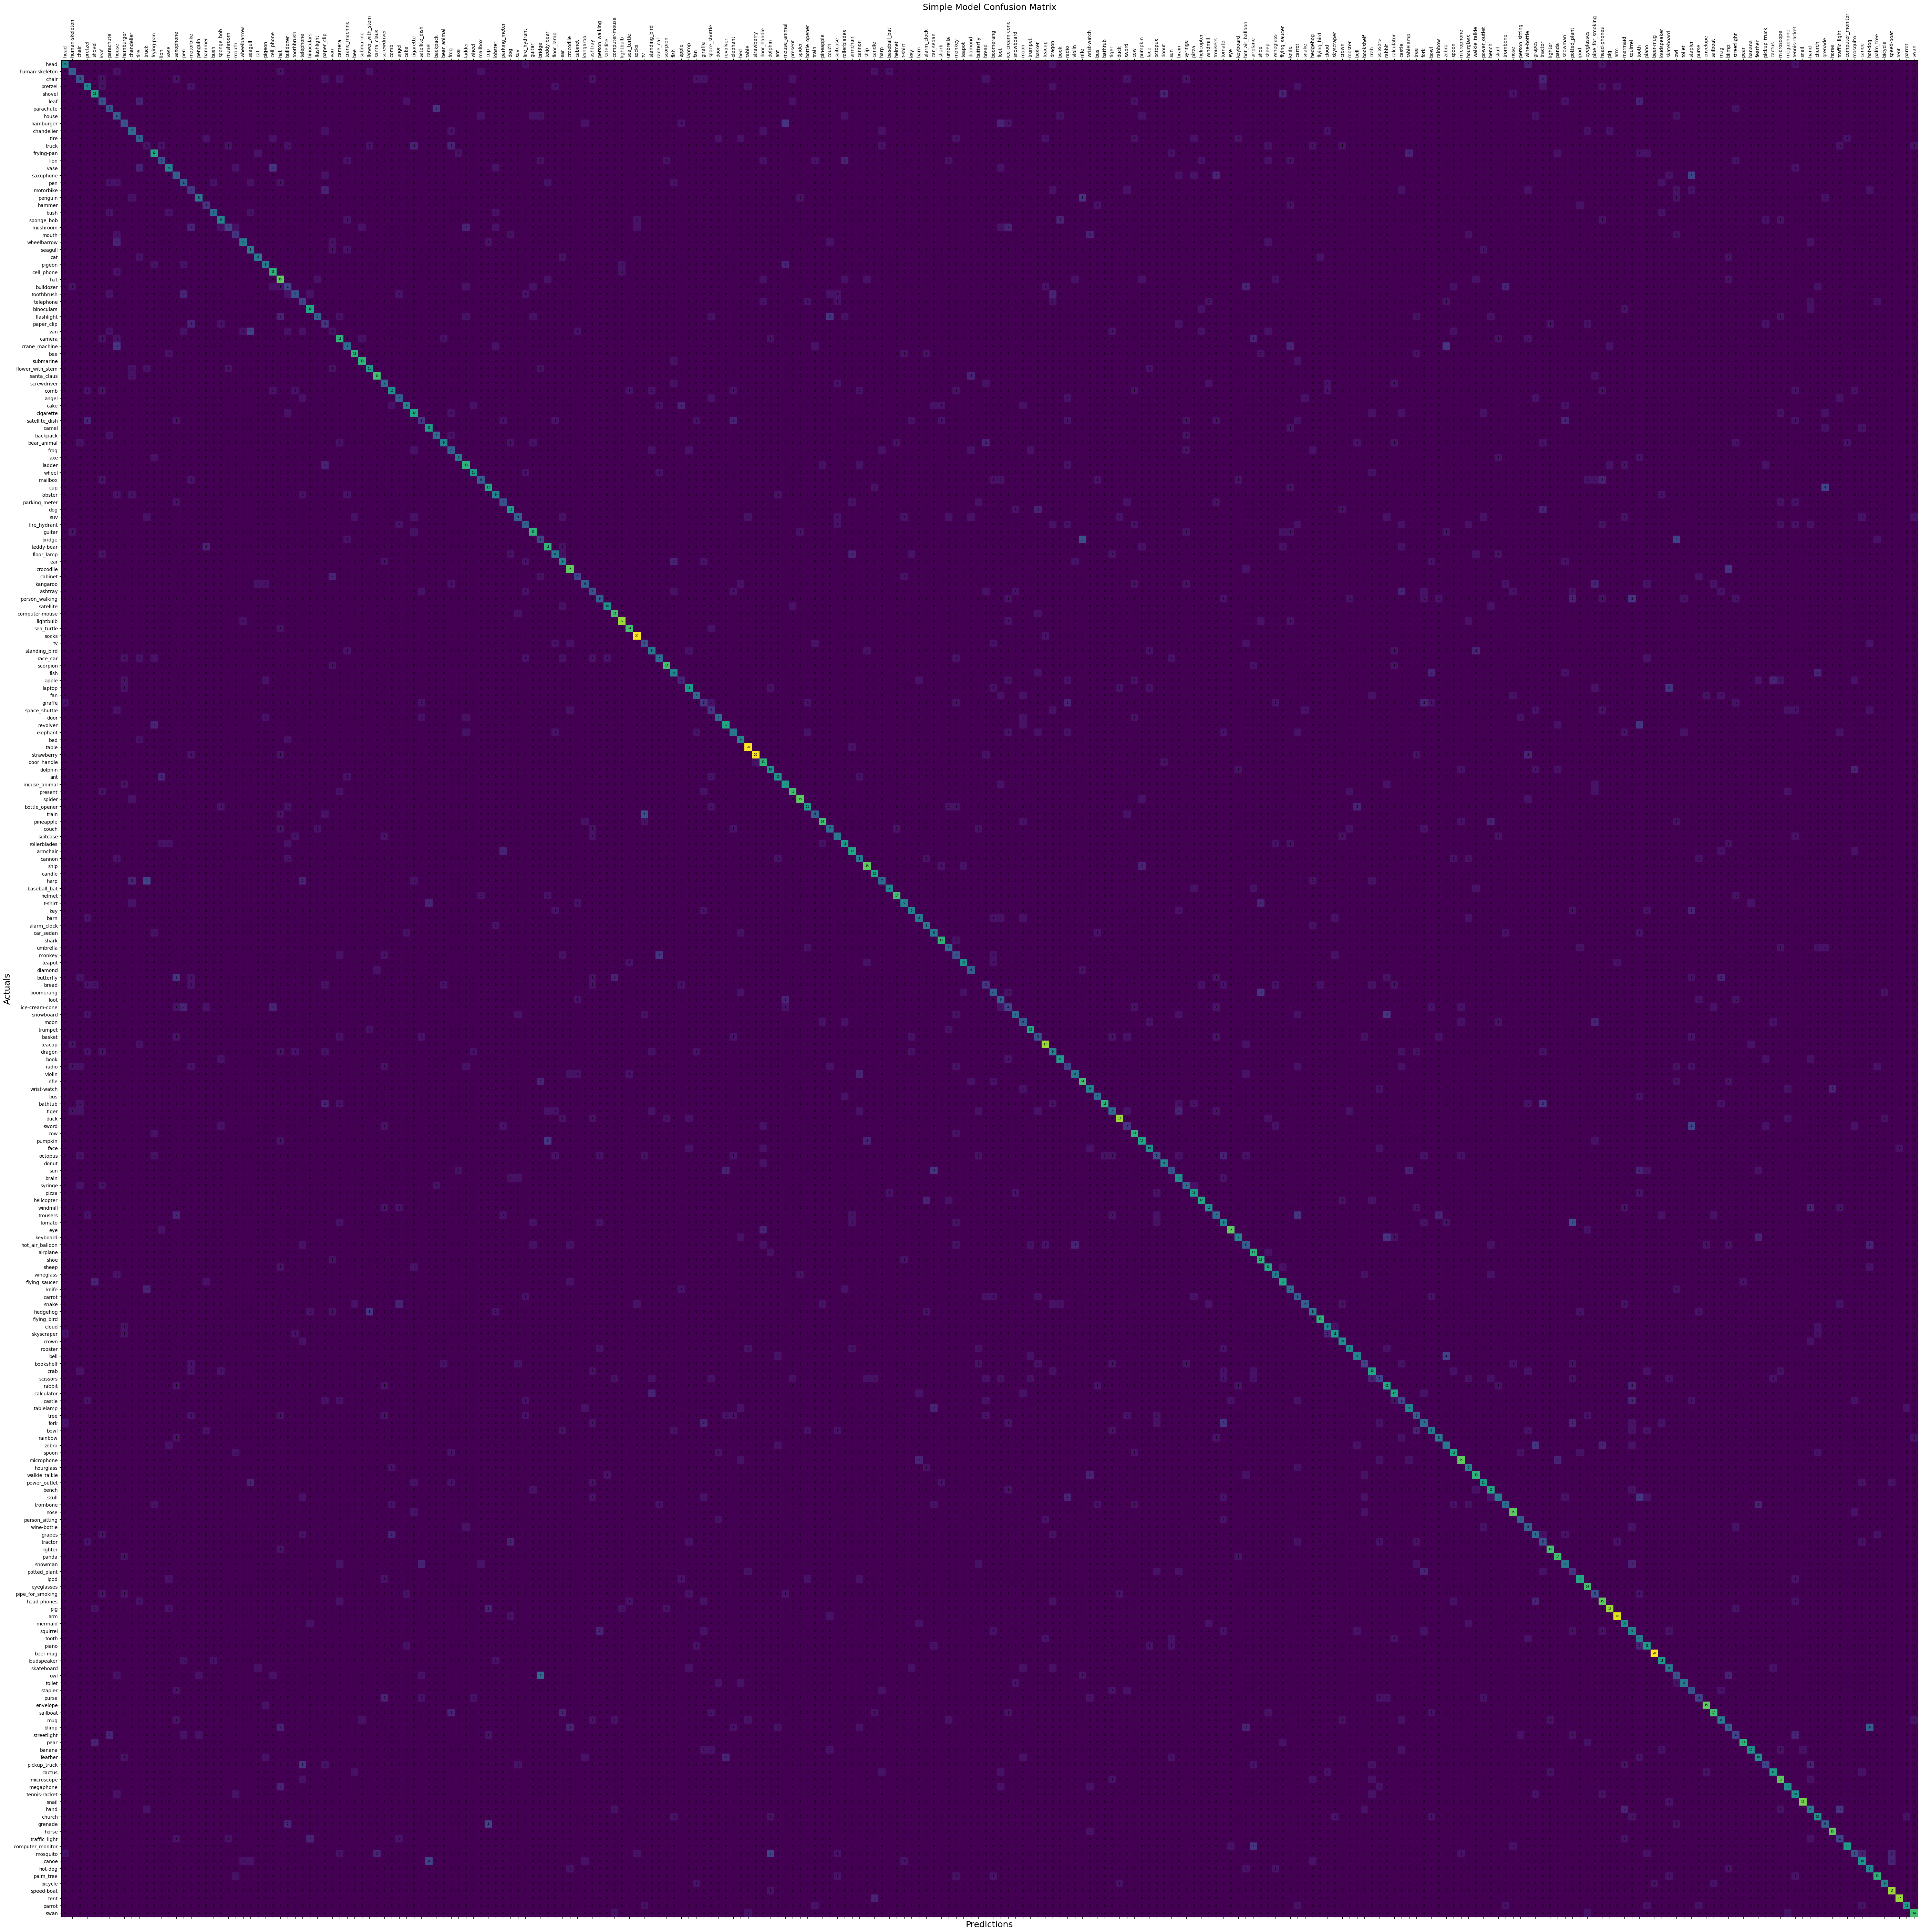

In [ ]:
fig, ax = plt.subplots(figsize=(70, 70))
ax.matshow(mc_resnet)
for i in range(mc_resnet.shape[0]):
  for j in range(mc_resnet.shape[1]):
    ax.text(x=j, y=i,s=round(mc_resnet[i, j], 2), va='center', ha='center', size='xx-small')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Simple Model Confusion Matrix', fontsize=18)
plt.xticks(range(250), labels=classes.values(), rotation=90)
plt.yticks(range(250), labels=classes.values())
#plt.savefig("matrix_de_confusion_simple.png")
plt.show()

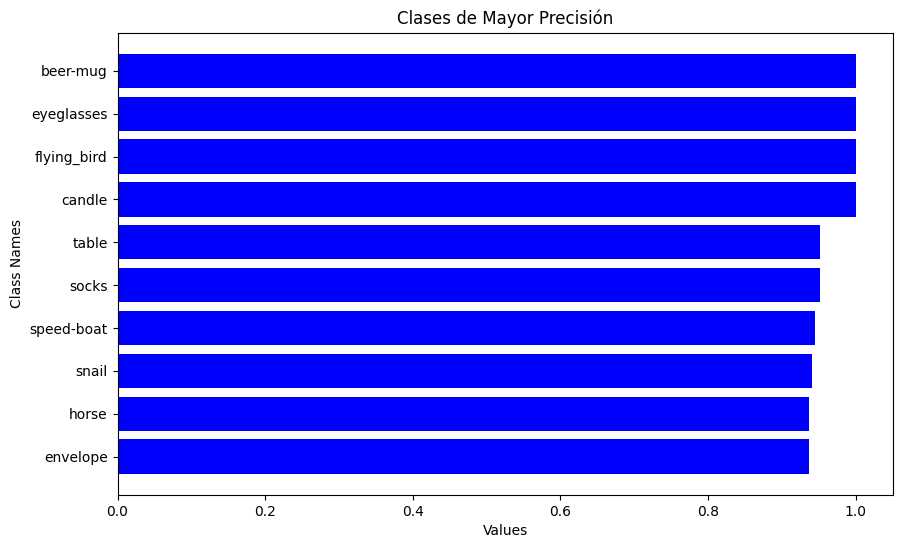

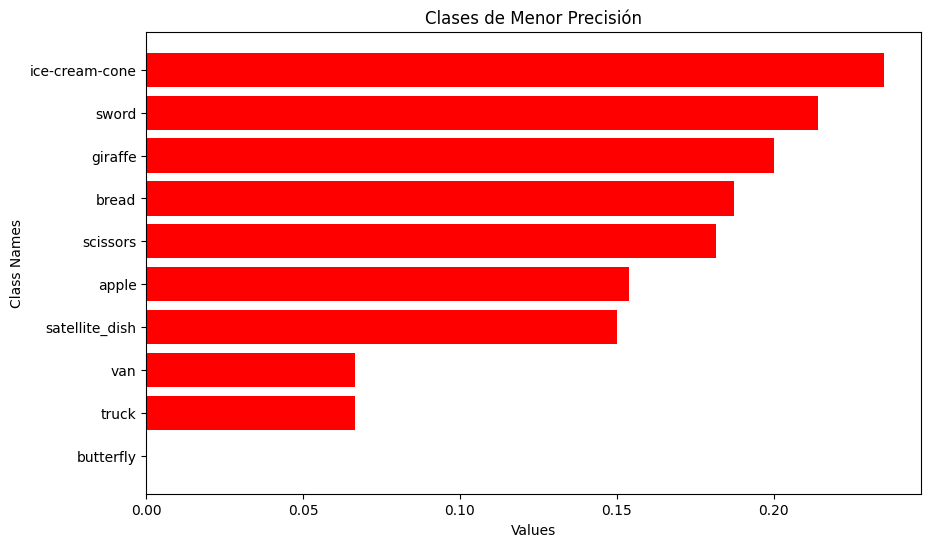

In [ ]:
# Supongamos que 'amogus' es tu lista de valores

# Crear una lista de tuplas con el nombre de la clase y el valor correspondiente
amogus_with_names = list(zip(classes.values(), accuracy_per_class_resnet))

# Ordenar la lista por los valores en orden ascendente
sorted_amogus = sorted(amogus_with_names, key=lambda x: x[1])

# Obtener los nombres y valores de las 10 clases más bajas y 10 clases más altas
top_10_highest = sorted_amogus[-10:]
top_10_lowest = sorted_amogus[:10]

# Separar los nombres y valores
names_highest, values_highest = zip(*top_10_highest)
names_lowest, values_lowest = zip(*top_10_lowest)

# Crear un gráfico de barras para los 10 valores más altos
plt.figure(figsize=(10, 6))
plt.barh(names_highest, values_highest, color='blue')
plt.xlabel('Values')
plt.ylabel('Class Names')
plt.title('Clases de Mayor Precisión')
plt.show()

# Crear un gráfico de barras para los 10 valores más bajos
plt.figure(figsize=(10, 6))
plt.barh(names_lowest, values_lowest, color='red')
plt.xlabel('Values')
plt.ylabel('Class Names')
plt.title('Clases de Menor Precisión')
plt.show()

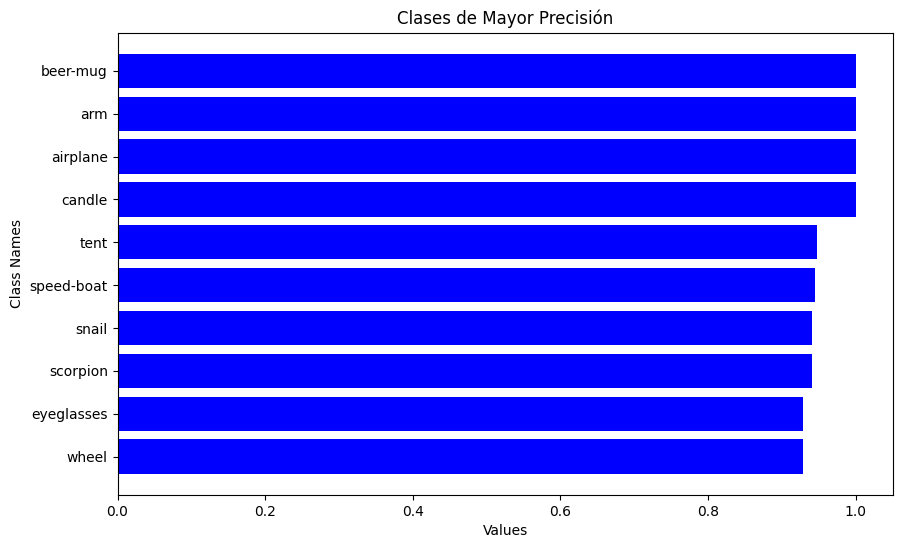

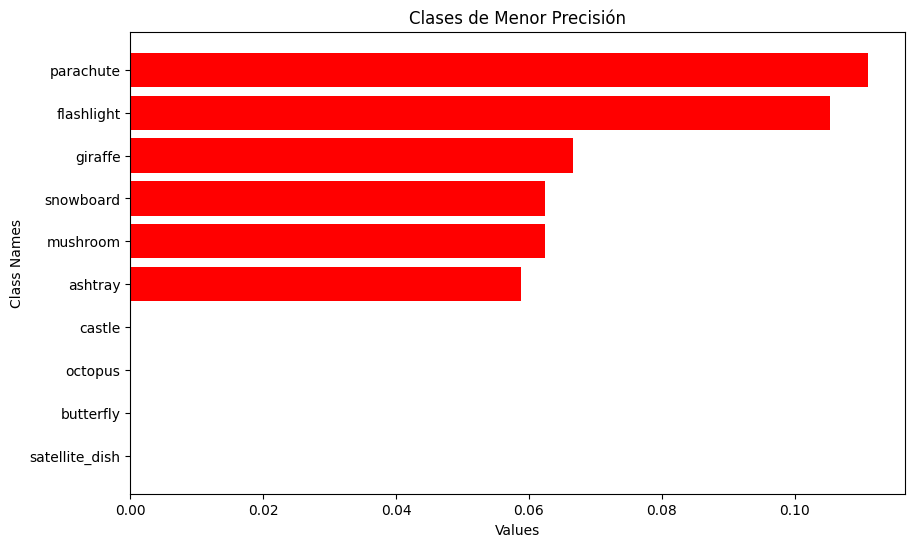

In [ ]:
# Supongamos que 'amogus' es tu lista de valores

# Crear una lista de tuplas con el nombre de la clase y el valor correspondiente
amogus_with_names = list(zip(classes.values(), accuracy_per_class_simple))

# Ordenar la lista por los valores en orden ascendente
sorted_amogus = sorted(amogus_with_names, key=lambda x: x[1])

# Obtener los nombres y valores de las 10 clases más bajas y 10 clases más altas
top_10_highest = sorted_amogus[-10:]
top_10_lowest = sorted_amogus[:10]

# Separar los nombres y valores
names_highest, values_highest = zip(*top_10_highest)
names_lowest, values_lowest = zip(*top_10_lowest)

# Crear un gráfico de barras para los 10 valores más altos
plt.figure(figsize=(10, 6))
plt.barh(names_highest, values_highest, color='blue')
plt.xlabel('Values')
plt.ylabel('Class Names')
plt.title('Clases de Mayor Precisión')
plt.show()

# Crear un gráfico de barras para los 10 valores más bajos
plt.figure(figsize=(10, 6))
plt.barh(names_lowest, values_lowest, color='red')
plt.xlabel('Values')
plt.ylabel('Class Names')
plt.title('Clases de Menor Precisión')
plt.show()

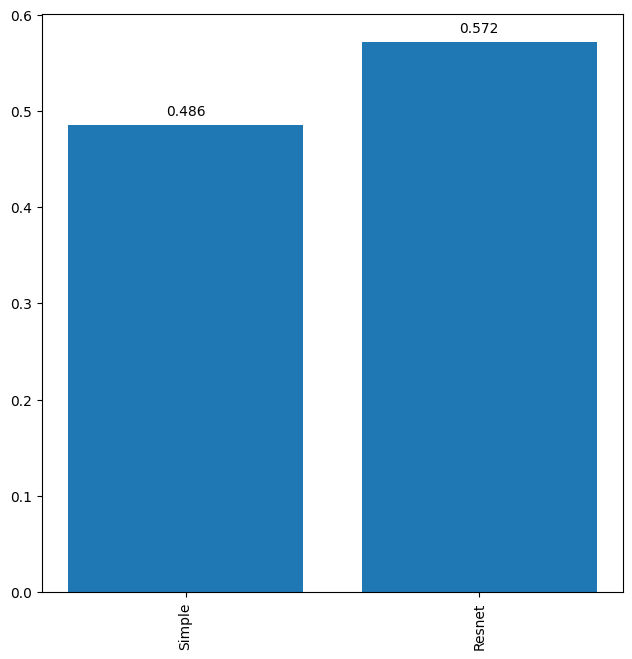

In [ ]:
model_accuracy = [simple_model_accuracy, resnet_model_accuracy]
fig, ax = plt.subplots(figsize = (7.5,7.5))
ax.bar(["Simple", "Resnet"], model_accuracy)
plt.xticks([0,1], labels=["Simple", "Resnet"], rotation=90)
#plt.yticks(range(250), labels=y)
for i, v in enumerate(model_accuracy):
    ax.text(i, v+0.01, str(round(v,3)), ha='center')
plt.show()